<a href="https://colab.research.google.com/github/Glaudou/UTS_ML2019_Main/blob/master/ASS2Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Imports
from google.colab import files
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [0]:
# Imports dataset from github repo

url = r"https://raw.githubusercontent.com/13194307/UTS_ML2019_ID13194307/master/ML_A2_PracticalProject/train.csv"
dataset = pd.read_csv(url)
fullDataset = pd.read_csv(url)

In [0]:
# Drops OutcomeSubtype since this attribute does not exist in test dataset and
# we only want to predict OutcomeType

dataset = dataset.drop(["OutcomeSubtype"], axis=1)
dataset.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,12-02-14 18:22,Return_to_owner,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [0]:
dataset.describe()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,2,5,44,1380,366
top,A710896,Max,11-08-15 0:00,Adoption,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,15595,9779,3969,8810,2824


In [0]:
dataset["OutcomeType"].value_counts()

Adoption           10769
Transfer            9422
Return_to_owner     4786
Euthanasia          1555
Died                 197
Name: OutcomeType, dtype: int64

In [0]:
dataset["OutcomeType"] = dataset["OutcomeType"].replace("Return_to_owner", "Return")
dataset.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,12-02-14 18:22,Return,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [0]:
# Checking if all non-NaN values consist of no more than two words: a number 
# followed by "day", "week", "month" or "year"

age = dataset["AgeuponOutcome"].dropna().str.split(" ")
count = age.apply(len)
count.value_counts()

2    26711
Name: AgeuponOutcome, dtype: int64

In [0]:
# Converts age column to an integer representing its age in days. For
# simplicity, a month is always assumed to be 30 days

def ageToDays(x):
    if type(x) == float:
        return -1
    else:
        x_split = x.split(" ")
        intComp = int(x_split[0])
        
        if "day" in x_split[1]:
            return intComp
        elif "week" in x_split[1]:
            return intComp * 7
        elif "month" in x_split[1]:
            return intComp * 30
        elif "year" in x_split[1]:
            return intComp * 365

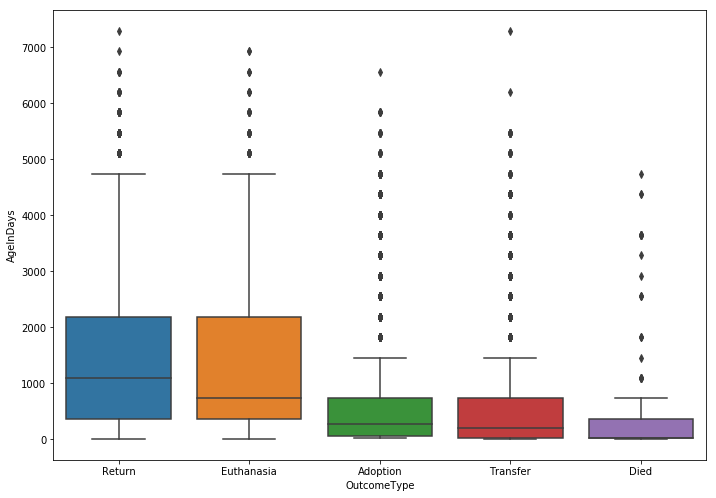

In [0]:
# Creates new AgeInDays column
age = dataset["AgeuponOutcome"]
dataset["AgeInDays"] = age.apply(ageToDays)

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x = "OutcomeType", y = "AgeInDays", data=dataset)

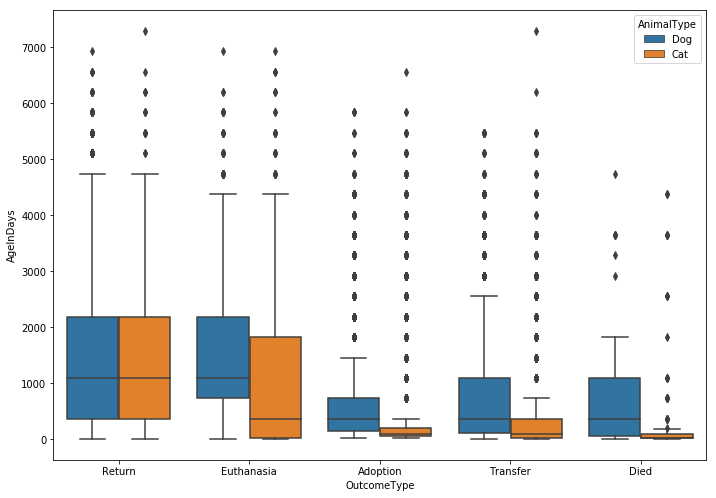

In [0]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.boxplot(ax=ax, x = "OutcomeType", y = "AgeInDays", hue="AnimalType", data=dataset)

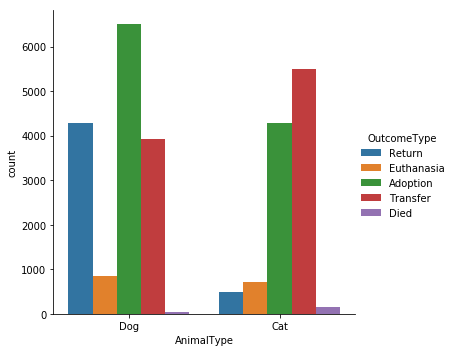

In [0]:
sns.catplot(x="AnimalType", kind="count", hue="OutcomeType", data=dataset)

In [0]:
dataset.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays
0,A671945,Hambone,12-02-14 18:22,Return,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365
1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365
2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730
3,A683430,NaN,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21
4,A667013,NaN,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730


In [0]:
dataset["SexuponOutcome"].value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
Name: SexuponOutcome, dtype: int64

In [0]:
# For creating gender and isDesexed columns
def getGender(x):
    if x == "Unknown" or type(x) == float:
        return "Unknown"
    
    return x.split(" ")[1]

def getIsDesexed(x):
    if x == "Unknown" or type(x) == float:
        return "Unknown"
    
    if x.split(" ")[0] == "Intact":
        return "No"
    else:
        return "Yes"

In [0]:
dataset["Gender"] = dataset["SexuponOutcome"].apply(getGender)
dataset["IsDesexed"] = dataset["SexuponOutcome"].apply(getIsDesexed)
dataset.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays,Gender,IsDesexed
0,A671945,Hambone,12-02-14 18:22,Return,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365,Male,Yes
1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365,Female,Yes
2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730,Male,Yes
3,A683430,NaN,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21,Male,No
4,A667013,NaN,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730,Male,Yes


In [0]:
#Checking if all dates are in consistent format (DD-MM-YY)
dates = dataset["DateTime"].str.split("-")

for date in dates:
    if int(date[1]) > 12 or int(date[0]) > 31:
        print("Incosistent date found:", date)

In [0]:
# Splits date column into 3 columns
def getDay(x):
    weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", 
                "Saturday", "Sunday"]
    x_split = x.split(" ")[0]
    day, month, year = x_split.split("-")
    date = datetime.date(int("20"+year), int(month), int(day))
    return weekdays[date.weekday()]
    
def getMonth(x):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug",
             "Sep", "Oct", "Nov", "Dec"]
    date = x.split(" ")[0]
    month = int(date.split("-")[1])
    return months[month-1]

def getYear(x):
    return x.split(" ")[0].split("-")[2]

def getIsWeekend(x):
    day = getDay(x)
    
    return (day == "Saturday" or day == "Sunday")

In [0]:
dataset["DayOfWeek"] = dataset["DateTime"].apply(getDay)
dataset["Month"] = dataset["DateTime"].apply(getMonth)
dataset["Year"] = dataset["DateTime"].apply(getYear)
dataset["IsWeekend"] = dataset["DateTime"].apply(getIsWeekend)
dataset.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays,Gender,IsDesexed,DayOfWeek,Month,Year,IsWeekend
0,A671945,Hambone,12-02-14 18:22,Return,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365,Male,Yes,Wednesday,Feb,14,False
1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365,Female,Yes,Sunday,Oct,13,True
2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730,Male,Yes,Saturday,Jan,15,True
3,A683430,NaN,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21,Male,No,Friday,Jul,14,False
4,A667013,NaN,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730,Male,Yes,Friday,Nov,13,False


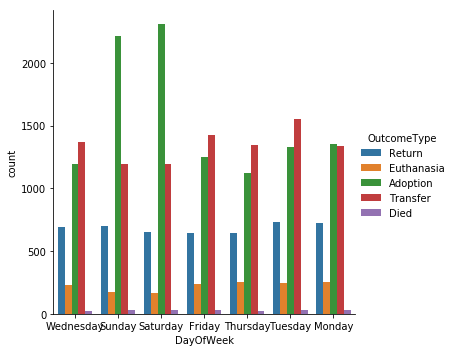

In [0]:
sns.catplot(x="DayOfWeek", kind="count", hue="OutcomeType", data=dataset)

In [0]:
def numericHour(x):
    time = x.split(" ")
    hour, minute = time[1].split(":")
    
    hour = int(hour)
    
    if int(minute) >= 30:
        hour = (hour+1) % 24
        
    return hour

def categoriseTime(x):
    hour = numericHour(x)
    
    if 6 <= hour <= 12:
        return "Morning"
    elif 12 <= hour <= 16:
        return "Afternoon"
    elif 16 <= hour <= 20:
        return "Evening"
    else:
        return "Night"

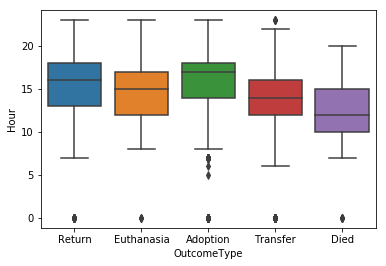

In [0]:
dataset["Hour"] = dataset["DateTime"].apply(numericHour)
sns.boxplot(x="OutcomeType", y="Hour", data=dataset)

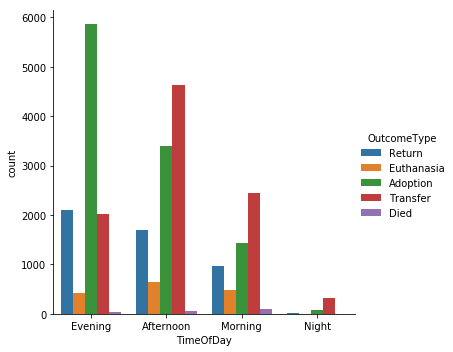

In [0]:
dataset["TimeOfDay"] = dataset["DateTime"].apply(categoriseTime)
sns.catplot(x="TimeOfDay", kind="count", hue="OutcomeType", data=dataset)

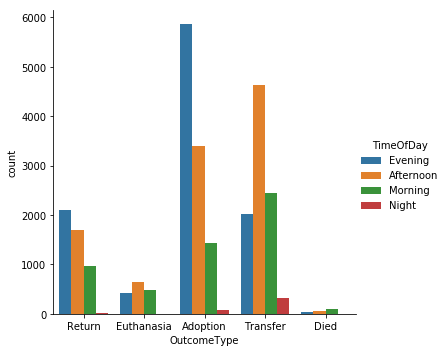

In [0]:
sns.catplot(x="OutcomeType", kind="count", hue="TimeOfDay", data=dataset)

In [0]:
returned = dataset["OutcomeType"] == "Return"
euth = dataset["OutcomeType"] == "Euthanasia"
adopt = dataset["OutcomeType"] == "Adoption"
transfer = dataset["OutcomeType"] == "Transfer"
died = dataset["OutcomeType"] == "Died"

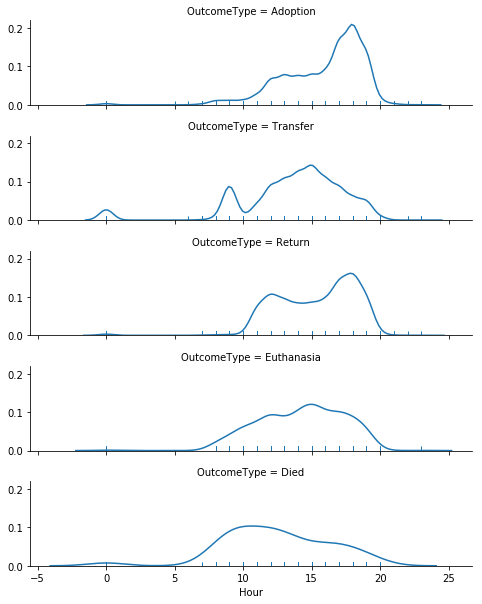

In [0]:
outcomes = dataset.OutcomeType.value_counts().index
g = sns.FacetGrid(dataset, row="OutcomeType", row_order=outcomes,
                  height=1.7, aspect=4,)
g.map(sns.distplot, "Hour", hist=False, rug=True);

In [0]:
dataset.head()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays,Gender,IsDesexed,DayOfWeek,Month,Year,IsWeekend,Hour,TimeOfDay
0,A671945,Hambone,12-02-14 18:22,Return,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365,Male,Yes,Wednesday,Feb,14,False,18,Evening
1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365,Female,Yes,Sunday,Oct,13,True,13,Afternoon
2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730,Male,Yes,Saturday,Jan,15,True,12,Morning
3,A683430,NaN,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21,Male,No,Friday,Jul,14,False,19,Evening
4,A667013,NaN,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730,Male,Yes,Friday,Nov,13,False,13,Afternoon


In [0]:
def changeNaNValues(x):
    if type(x) == float:
        return "Unknown"
    
    return x

In [0]:
dataset["Name"] = dataset["Name"].apply(changeNaNValues)
dataset["Breed"] = dataset["Breed"].apply(changeNaNValues)
dataset["Color"] = dataset["Color"].apply(changeNaNValues)

In [0]:
dataset.to_csv("modifiedDataset.csv")

In [0]:
files.download("modifiedDataset.csv")

MessageError: ignored

In [0]:
dataset.head()
#dataset.describe()

,AnimalID,Name,DateTime,OutcomeType,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,AgeInDays,Gender,IsDesexed,DayOfWeek,Month,Year,IsWeekend,Hour,TimeOfDay
0,A671945,Hambone,12-02-14 18:22,Return,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,365,Male,Yes,Wednesday,Feb,14,False,18,Evening
1,A656520,Emily,13-10-13 12:44,Euthanasia,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,365,Female,Yes,Sunday,Oct,13,True,13,Afternoon
2,A686464,Pearce,31-01-15 12:28,Adoption,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,730,Male,Yes,Saturday,Jan,15,True,12,Morning
3,A683430,Unknown,11-07-14 19:09,Transfer,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,21,Male,No,Friday,Jul,14,False,19,Evening
4,A667013,Unknown,15-11-13 12:52,Transfer,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,730,Male,Yes,Friday,Nov,13,False,13,Afternoon


In [0]:
X = dataset.iloc[:, [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17]].values
y = dataset.iloc[:, 3].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

ValueError: ignored